In [1]:
import numpy as np
import matplotlib.pyplot as plt

from proj1_helpers import *
from functions import *

y, x, ids = load_csv_data('train.csv')
y_t, x_t, ids_t = load_csv_data('test.csv')


In [2]:
columns_to_keep = [0,1,2,3,4,5,6,10,11,12,13,22,24]
x1 = x[:, columns_to_keep]
y1=y
#remove -999 and put them clos to the rest of the data
min_ = x1[x1!=-999].min()-1
x1[x1<=-998]= min_


In [3]:
# remove outliers
x1 = x1
y1 = y1
threshold = []
for i in range(x1.shape[1]):
    # get value of each column of the 99 percentile
    threshold += [np.percentile(x1[:,i], 99)]
for i in range(x1.shape[1]):
    y1 = y1[x1[:,i]<=threshold[i]]
    x1 = x1[x1[:,i]<=threshold[i]]
print('{} % of the data was removed'.format(int(100*(1-len(x1)/len(x)))))

8 % of the data was removed


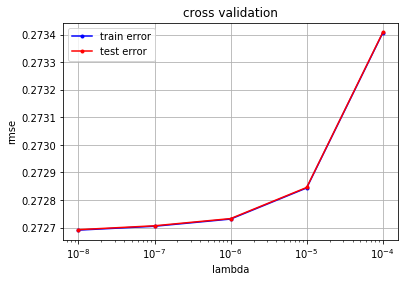

<Figure size 432x288 with 0 Axes>

In [14]:
rmse_tr, rmse_te= cross_validation_accross_lambdas(x1, y1, \
                        lambdas = np.logspace(-8, -4, 5), degree = 12,regression= 'ridge_regression')

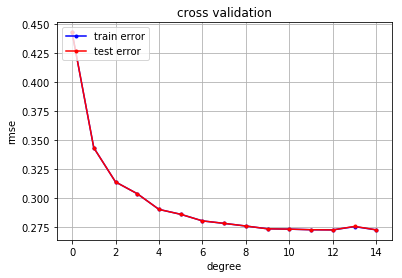

<Figure size 432x288 with 0 Axes>

In [15]:
rmse_tr, rmse_te=cross_validation_accross_degrees(x1, y1, \
                        degrees = range(0,15), lambda_ = 0, regression = 'ridge_regression')